# Exploring Dandiset 000673: Control of working memory by phase–amplitude coupling of human hippocampal neurons

> **⚠️ AI-GENERATED NOTEBOOK DISCLAIMER**
>
> This notebook was AI-generated using dandi-notebook-gen and has not been fully verified.
> Users should exercise caution when interpreting the code or results.
> The analyses presented may contain errors or inaccuracies.

## Overview

This notebook explores Dandiset 000673, which contains electrophysiological recordings from human medial temporal lobe and medial frontal cortex during a working memory task (Sternberg task). The dataset includes:

- Local Field Potential (LFP) recordings from multiple brain regions
- Single neuron recordings (spike times)
- Behavioral data from the Sternberg task
- Stimulus presentation information and images

The research investigates how cognitive control regulates working memory storage, focusing on the role of theta-gamma phase-amplitude coupling (TG-PAC) in the hippocampus. The data was recorded from patients with intractable epilepsy implanted with depth electrodes.

For more information, you can visit the associated GitHub repository: https://github.com/rutishauserlab/SBCAT-release-NWB

## Required Packages

This notebook utilizes several Python packages for accessing and analyzing the data:

In [1]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pynwb
import h5py
import remfile
from scipy import signal
import os

# Configure plotting
sns.set_theme()
plt.rcParams['figure.figsize'] = [12, 8]

## Loading the Dandiset

First, we'll access the Dandiset directly using the asset URL. For a more comprehensive approach, you could use the DANDI API.

In [2]:
# Define the URL for the first subject's NWB file
asset_url = "https://api.dandiarchive.org/api/assets/65a7e913-45c7-48db-bf19-b9f5e910110a/download/"

# Print Dandiset information
print(f"Dandiset: 000673 - Control of working memory by phase–amplitude coupling of human hippocampal neurons")

print(f"Working with NWB file at: {asset_url}")
print(f"This file is from Subject 1, Session 1.")

Dandiset: 000673 - Control of working memory by phase–amplitude coupling of human hippocampal neurons
Working with NWB file at: https://api.dandiarchive.org/api/assets/65a7e913-45c7-48db-bf19-b9f5e910110a/download/
This file is from Subject 1, Session 1.


## Exploring a Single NWB File

We'll examine the first subject's NWB file in detail. This data contains recordings from a subject performing the Sternberg task.

In [3]:
# Load the NWB file
remote_file = remfile.File(asset_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


/opt/conda/lib/python3.11/site-packages/pynwb/ecephys.py:109: UserWarning: ElectricalSeries 'LFPs': The second dimension of data does not match the length of electrodes. Your data may be transposed.
  warnings.warn("%s '%s': The second dimension of data does not match the length of electrodes. "


### Basic File Information

Let's explore the basic information about the recording session:

In [4]:
# Print basic information
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experiment description: {nwb.experiment_description}")
print(f"Session ID: {nwb.session_id}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

# Subject information
print("\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Age: {nwb.subject.age}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")

Session description: SBCAT_ID: 1
Identifier: sub-1_ses-1_P55CS
Session start time: 2018-01-01 00:00:00-08:00
Experiment description: This data contains electrophysiological recordings and behavior from the Sternberg task performed in patients with intractable epilepsy implanted with depth electrodes and Behnke-Fried microwires in the human medial temporal lobe and medial frontal cortex.
Session ID: 1
Lab: Rutishauser
Institution: Cedars-Sinai Medical Center

Subject Information:
Subject ID: 1
Age: P43Y
Species: Homo sapiens
Sex: F


### Electrode Information

The dataset contains recordings from multiple brain regions. Let's examine the electrode setup:

Number of electrodes: 74

Electrodes by brain region:
  dorsal_anterior_cingulate_cortex_left: 8
  pre_supplementary_motor_area_right: 8
  amygdala_right: 8
  dorsal_anterior_cingulate_cortex_right: 8
  pre_supplementary_motor_area_left: 7
  hippocampus_left: 7
  amygdala_left: 7
  hippocampus_right: 7
  ventral_medial_prefrontal_cortex_right: 7
  ventral_medial_prefrontal_cortex_left: 7


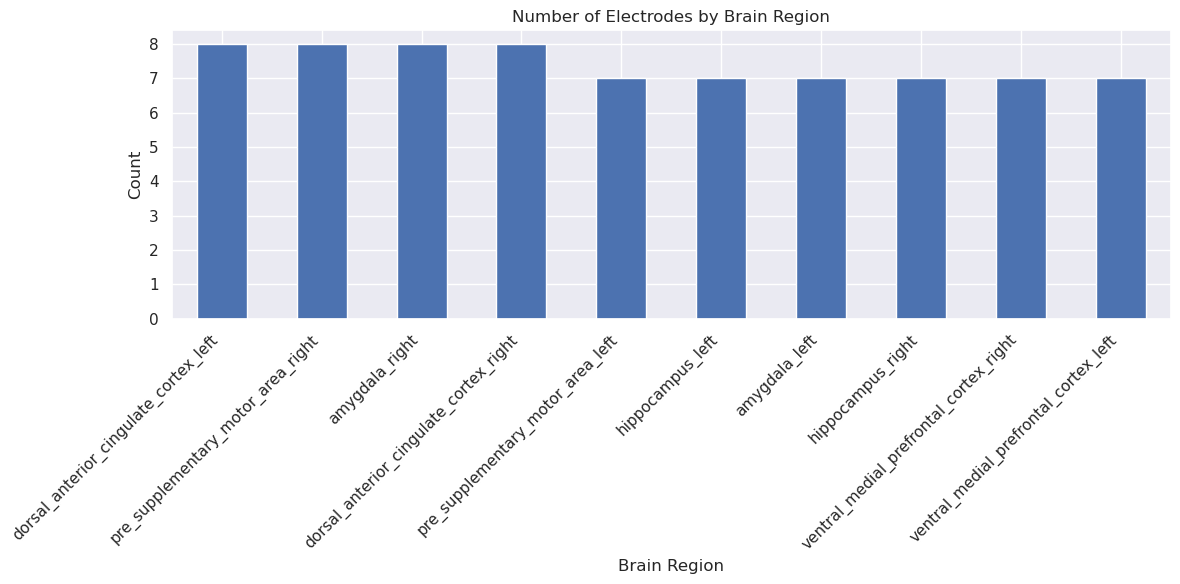

In [5]:
# Get electrode information
electrode_df = nwb.electrodes.to_dataframe()

# Count electrodes by brain region
region_counts = electrode_df['location'].value_counts()
print(f"Number of electrodes: {len(electrode_df)}")
print("\nElectrodes by brain region:")
for region, count in region_counts.items():
    print(f"  {region}: {count}")

# Plot electrode distribution
plt.figure(figsize=(12, 6))
region_counts.plot(kind='bar')
plt.title('Number of Electrodes by Brain Region')
plt.ylabel('Count')
plt.xlabel('Brain Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Local Field Potential (LFP) Data

Local Field Potentials (LFPs) represent the summed electrical activity of a local neural population. Let's explore the LFP data from different brain regions.

In [6]:
# Get LFP data
lfps = nwb.acquisition["LFPs"]
print(f"LFP data shape: {lfps.data.shape}")
print(f"Sampling rate: {lfps.rate} Hz")

# Get electrode indices and match with electrodes table
electrode_indices = lfps.electrodes.data[:]
electrode_info = electrode_df.iloc[electrode_indices]

LFP data shape: (550276, 70)
Sampling rate: 400.0 Hz


### Visualizing LFP from Different Brain Regions

Let's visualize a sample of LFP data from different brain regions:

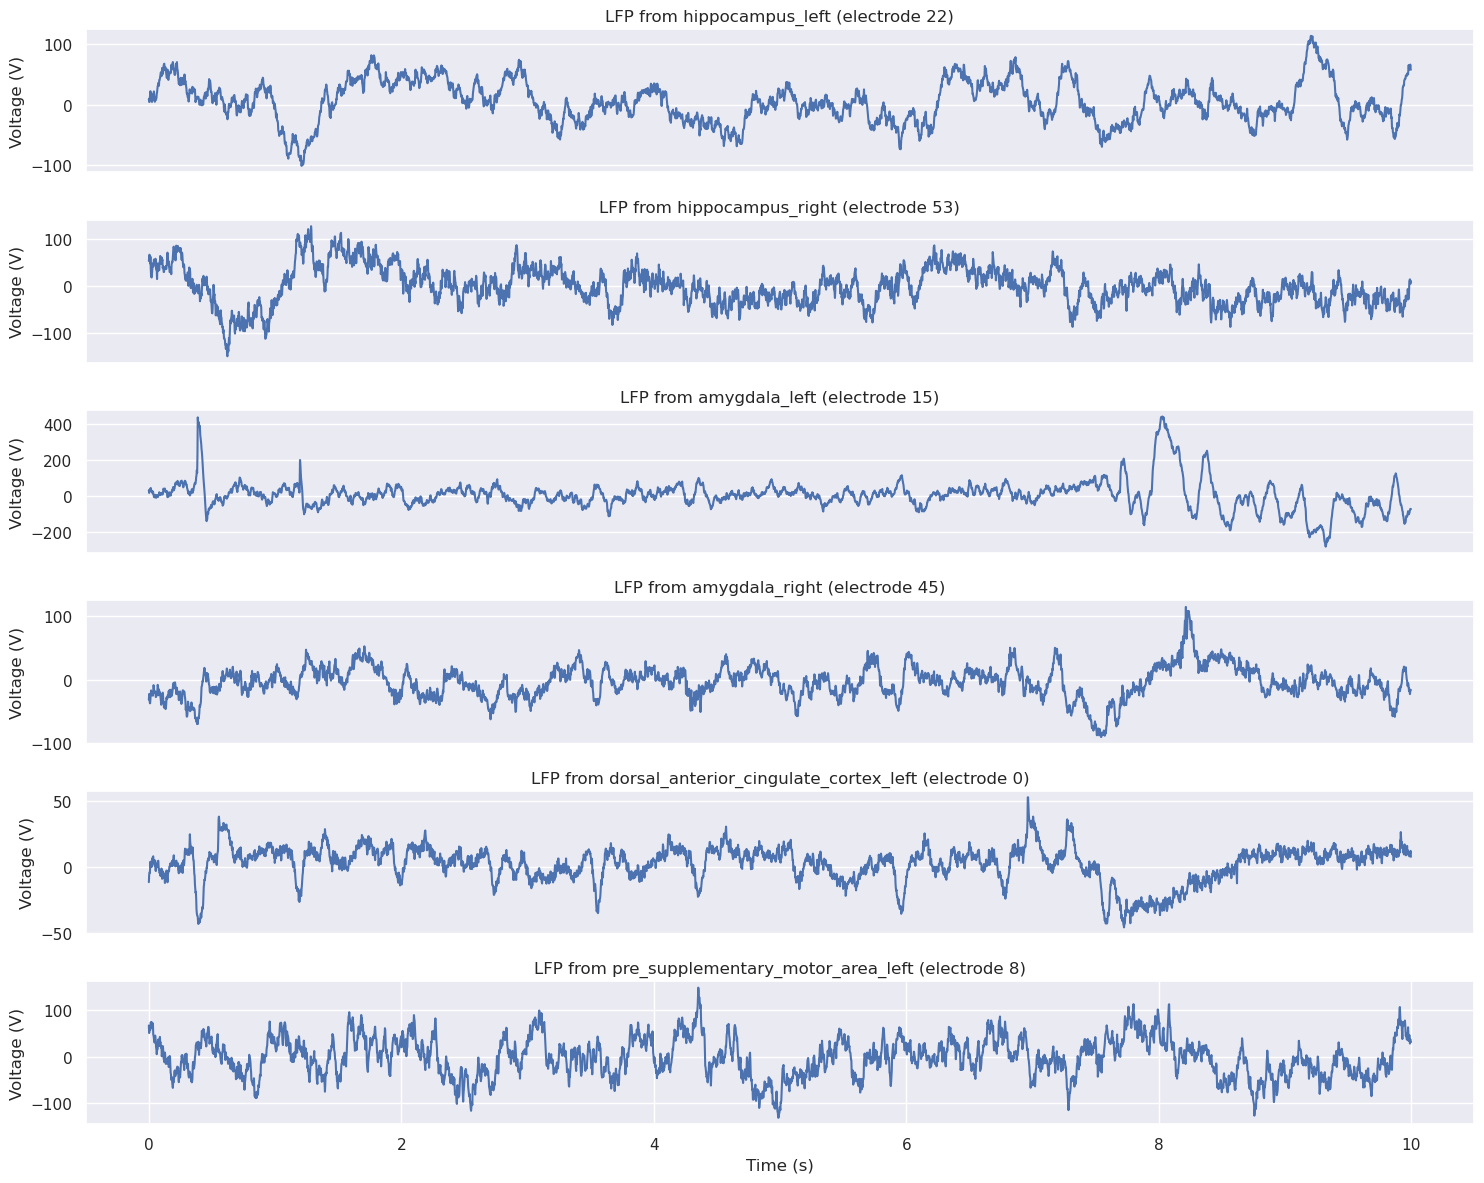

In [7]:
# Select regions to plot
regions_to_plot = [
    'hippocampus_left',
    'hippocampus_right',
    'amygdala_left', 
    'amygdala_right',
    'dorsal_anterior_cingulate_cortex_left',
    'pre_supplementary_motor_area_left'
]

# Get regions that have electrodes
available_regions = []
region_electrodes = {}

for region in regions_to_plot:
    region_elecs = electrode_info[electrode_info['location'] == region].index.tolist()
    if region_elecs:
        available_regions.append(region)
        region_electrodes[region] = region_elecs

# Get a sample of LFP data (10 seconds at 400Hz = 4000 samples)
start_sample = int(60 * lfps.rate)  # 1 minute into the recording
duration_samples = int(10 * lfps.rate)  # 10 seconds
time_axis = np.arange(duration_samples) / lfps.rate  # Time in seconds

# Plot LFP for each available region
plt.figure(figsize=(15, 12))
for i, region in enumerate(available_regions):
    # Find electrode indices for this region
    region_elecs = region_electrodes[region]
    
    if region_elecs:
        # Select one electrode from this region
        electrode_idx = np.where(electrode_indices == region_elecs[0])[0][0]
        
        # Get LFP data for this electrode
        lfp_data = lfps.data[start_sample:start_sample+duration_samples, electrode_idx]
        
        # Plot LFP
        plt.subplot(len(available_regions), 1, i+1)
        plt.plot(time_axis, lfp_data)
        plt.title(f"LFP from {region} (electrode {region_elecs[0]})")
        plt.ylabel('Voltage (V)')
        
        if i == len(available_regions) - 1:
            plt.xlabel('Time (s)')
        else:
            plt.xticks([])

plt.tight_layout()

### LFP During Trial

Now let's examine the LFP activity during a specific trial to understand how neural activity relates to the task:

Number of trials: 140
Trial columns: ['loads', 'PicIDs_Encoding1', 'PicIDs_Encoding2', 'PicIDs_Encoding3', 'PicIDs_Probe', 'start_time', 'stop_time', 'timestamps_FixationCross', 'timestamps_Encoding1', 'timestamps_Encoding1_end', 'timestamps_Encoding2', 'timestamps_Encoding2_end', 'timestamps_Encoding3', 'timestamps_Encoding3_end', 'timestamps_Maintenance', 'timestamps_Probe', 'timestamps_Response', 'response_accuracy', 'probe_in_out']


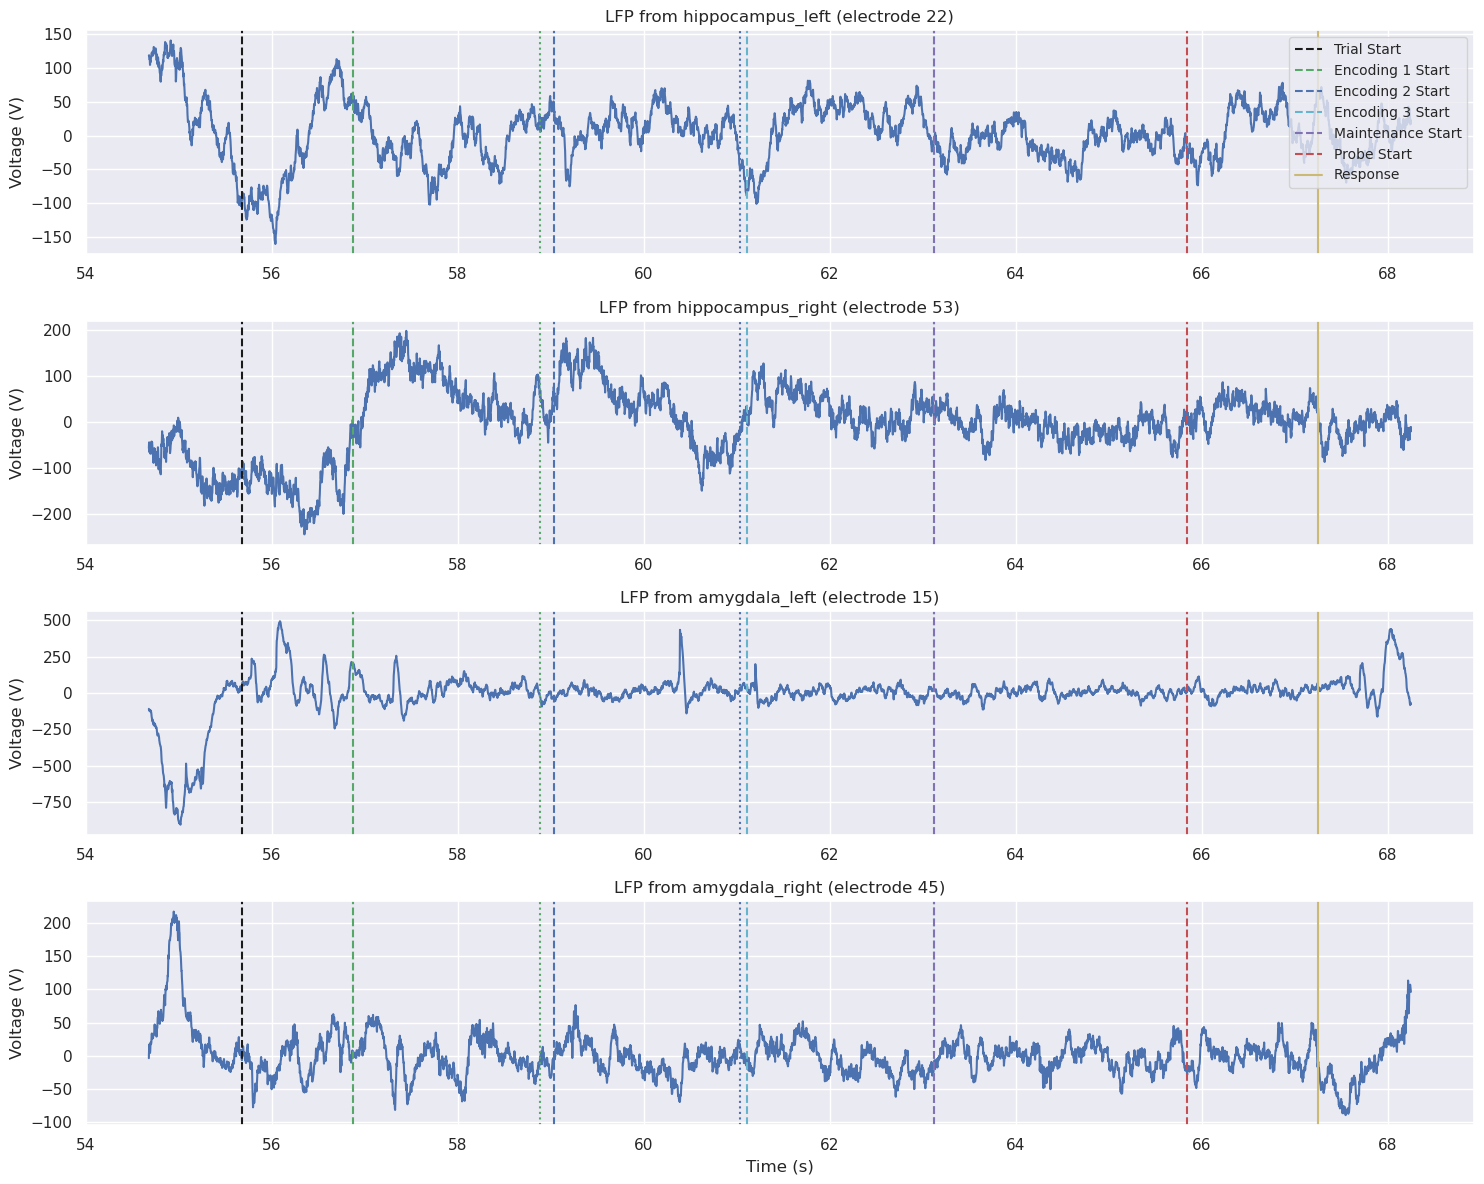

In [8]:
# Get trial information
trials = nwb.trials.to_dataframe()
print(f"Number of trials: {len(trials)}")
print(f"Trial columns: {trials.columns.tolist()}")

# Select one trial to visualize
trial_idx = 5  # Arbitrary trial
trial = trials.iloc[trial_idx]

# Get key timestamps
trial_start = trial['timestamps_FixationCross']
encoding1_start = trial['timestamps_Encoding1']
encoding1_end = trial['timestamps_Encoding1_end']
encoding2_start = trial['timestamps_Encoding2']
encoding2_end = trial['timestamps_Encoding2_end']
encoding3_start = trial['timestamps_Encoding3']
encoding3_end = trial['timestamps_Encoding3_end']
maintenance_start = trial['timestamps_Maintenance']
probe_start = trial['timestamps_Probe']
response_time = trial['timestamps_Response']

# Get sample indices
def time_to_sample(timestamp):
    return int((timestamp - lfps.starting_time) * lfps.rate)

# Calculate indices
trial_start_sample = time_to_sample(trial_start)
encoding1_start_sample = time_to_sample(encoding1_start)
encoding1_end_sample = time_to_sample(encoding1_end)
encoding2_start_sample = time_to_sample(encoding2_start)
encoding2_end_sample = time_to_sample(encoding2_end)
encoding3_start_sample = time_to_sample(encoding3_start)
encoding3_end_sample = time_to_sample(encoding3_end)
maintenance_start_sample = time_to_sample(maintenance_start)
probe_start_sample = time_to_sample(probe_start)
response_sample = time_to_sample(response_time)

# Get data range for trial
buffer_samples = int(1 * lfps.rate)  # 1 second buffer
start_sample = trial_start_sample - buffer_samples
end_sample = response_sample + buffer_samples
duration_samples = end_sample - start_sample

# Create time axis for trial
trial_time_axis = np.arange(duration_samples) / lfps.rate
trial_time_axis = trial_time_axis + (trial_start - buffer_samples / lfps.rate - lfps.starting_time)

# Plot LFP for a subset of regions during the trial
plt.figure(figsize=(15, 12))
regions_to_show = available_regions[:4]  # Show 4 regions to keep the plot clean

for i, region in enumerate(regions_to_show):
    # Find electrode indices for this region
    region_elecs = region_electrodes[region]
    
    if region_elecs:
        # Select one electrode from this region
        electrode_idx = np.where(electrode_indices == region_elecs[0])[0][0]
        
        # Get LFP data for this electrode during the trial
        lfp_data = lfps.data[start_sample:end_sample, electrode_idx]
        
        # Plot LFP
        plt.subplot(len(regions_to_show), 1, i+1)
        plt.plot(trial_time_axis, lfp_data)
        plt.title(f"LFP from {region} (electrode {region_elecs[0]})")
        plt.ylabel('Voltage (V)')
        
        # Add vertical lines for event markers
        plt.axvline(x=trial_start, color='k', linestyle='--', label='Trial Start')
        plt.axvline(x=encoding1_start, color='g', linestyle='--', label='Encoding 1 Start')
        plt.axvline(x=encoding1_end, color='g', linestyle=':')
        plt.axvline(x=encoding2_start, color='b', linestyle='--', label='Encoding 2 Start')
        plt.axvline(x=encoding2_end, color='b', linestyle=':')
        plt.axvline(x=encoding3_start, color='c', linestyle='--', label='Encoding 3 Start')
        plt.axvline(x=encoding3_end, color='c', linestyle=':')
        plt.axvline(x=maintenance_start, color='m', linestyle='--', label='Maintenance Start')
        plt.axvline(x=probe_start, color='r', linestyle='--', label='Probe Start')
        plt.axvline(x=response_time, color='y', label='Response')
        
        if i == 0:
            plt.legend(loc='upper right', fontsize='small')
        
        if i == len(regions_to_show) - 1:
            plt.xlabel('Time (s)')

plt.tight_layout()

## Time-Frequency Analysis

Let's perform a time-frequency analysis to examine spectral content in the LFP data. This will help us understand the oscillatory patterns in different frequency bands:

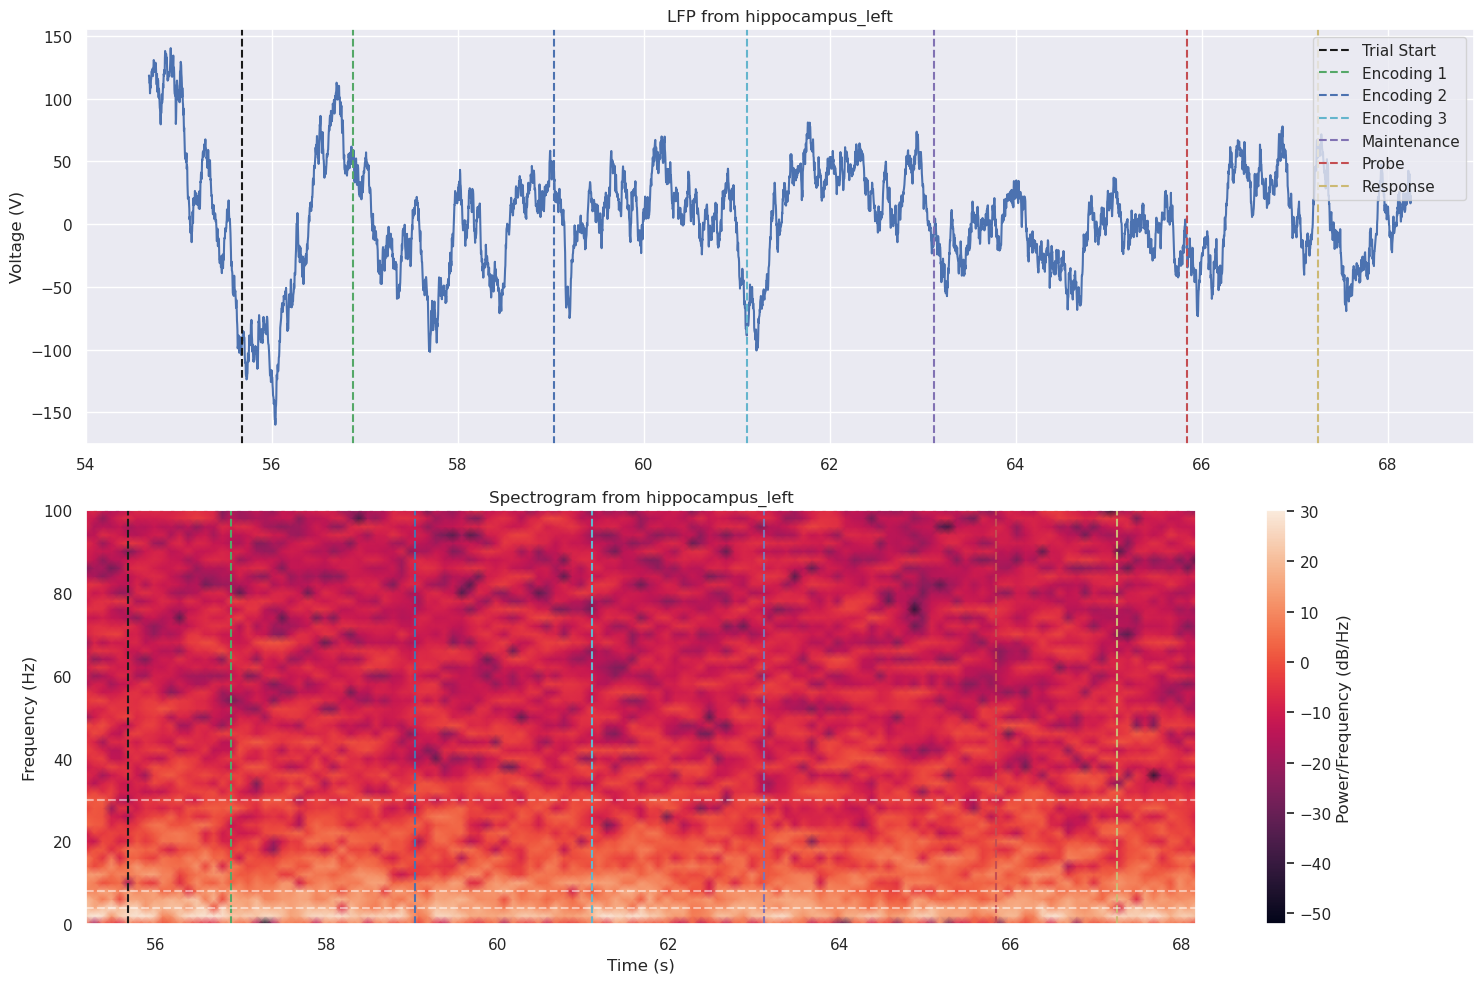

In [9]:
# Select a brain region of interest (hippocampus)
selected_region = 'hippocampus_left'
region_elecs = electrode_info[electrode_info['location'] == selected_region].index.tolist()

if region_elecs:
    # Select one electrode
    electrode_idx = np.where(electrode_indices == region_elecs[0])[0][0]
    
    # Get LFP data for this electrode during the trial
    lfp_data = lfps.data[start_sample:end_sample, electrode_idx]
    
    # Calculate spectrogram
    fs = lfps.rate
    nperseg = int(0.5 * fs)  # 500 ms window
    noverlap = int(0.4 * fs)  # 80% overlap
    
    f, t, Sxx = signal.spectrogram(lfp_data, fs=fs, nperseg=nperseg, noverlap=noverlap)
    
    # Plot spectrogram
    plt.figure(figsize=(15, 10))
    
    # Plot the LFP signal
    plt.subplot(2, 1, 1)
    plt.plot(trial_time_axis, lfp_data)
    plt.title(f"LFP from {selected_region}")
    plt.ylabel('Voltage (V)')
    
    # Add vertical lines for event markers
    plt.axvline(x=trial_start, color='k', linestyle='--', label='Trial Start')
    plt.axvline(x=encoding1_start, color='g', linestyle='--', label='Encoding 1')
    plt.axvline(x=encoding2_start, color='b', linestyle='--', label='Encoding 2')
    plt.axvline(x=encoding3_start, color='c', linestyle='--', label='Encoding 3')
    plt.axvline(x=maintenance_start, color='m', linestyle='--', label='Maintenance')
    plt.axvline(x=probe_start, color='r', linestyle='--', label='Probe')
    plt.axvline(x=response_time, color='y', linestyle='--', label='Response')
    plt.legend(loc='upper right')
    
    # Plot the spectrogram
    plt.subplot(2, 1, 2)
    # Adjust time values to match trial time
    t_adjusted = t + (trial_time_axis[0] + nperseg/(2*fs))
    # Plot only frequencies up to 100 Hz
    freq_mask = f <= 100
    plt.pcolormesh(t_adjusted, f[freq_mask], 10*np.log10(Sxx[freq_mask]), shading='gouraud')
    plt.ylabel('Frequency (Hz)')
    plt.xlabel('Time (s)')
    plt.title(f'Spectrogram from {selected_region}')
    plt.colorbar(label='Power/Frequency (dB/Hz)')
    
    # Add vertical lines for event markers on spectrogram
    plt.axvline(x=trial_start, color='k', linestyle='--')
    plt.axvline(x=encoding1_start, color='g', linestyle='--')
    plt.axvline(x=encoding2_start, color='b', linestyle='--')
    plt.axvline(x=encoding3_start, color='c', linestyle='--')
    plt.axvline(x=maintenance_start, color='m', linestyle='--')
    plt.axvline(x=probe_start, color='r', linestyle='--')
    plt.axvline(x=response_time, color='y', linestyle='--')
    
    # Highlight theta (4-8 Hz) and gamma (30-100 Hz) bands
    plt.axhline(y=4, color='w', linestyle='--', alpha=0.5)
    plt.axhline(y=8, color='w', linestyle='--', alpha=0.5)
    plt.axhline(y=30, color='w', linestyle='--', alpha=0.5)
    plt.axhline(y=100, color='w', linestyle='--', alpha=0.5)
    
    plt.tight_layout()

## Single Unit Activity

Now let's examine the activity of individual neurons (units) in the dataset:

In [10]:
# Get unit information
units_df = nwb.units.to_dataframe()
print(f"Number of units: {len(units_df)}")
print(f"Unit columns: {units_df.columns.tolist()}")

# Create electrode location mapping for each unit
unit_locations = []
for idx, unit in units_df.iterrows():
    electrode_id = unit['electrodes']
    if isinstance(electrode_id, np.ndarray):
        if electrode_id.size > 0:
            # Take the first electrode if there are multiple
            first_electrode = electrode_id.item(0) if electrode_id.size == 1 else electrode_id[0]
            location = electrode_df.loc[first_electrode, 'location']
            unit_locations.append(location)
        else:
            unit_locations.append('Unknown')
    elif electrode_id is not None:
        try:
            location = electrode_df.loc[electrode_id, 'location']
            unit_locations.append(location)
        except:
            unit_locations.append('Unknown')
    else:
        unit_locations.append('Unknown')

units_df['location'] = unit_locations

Number of units: 46
Unit columns: ['spike_times', 'electrodes', 'clusterID_orig', 'waveforms', 'waveforms_mean_snr', 'waveforms_peak_snr', 'waveforms_isolation_distance', 'waveforms_mean_proj_dist']


### Unit Raster Plots

Let's create raster plots to visualize spike timing for a few units during trials:

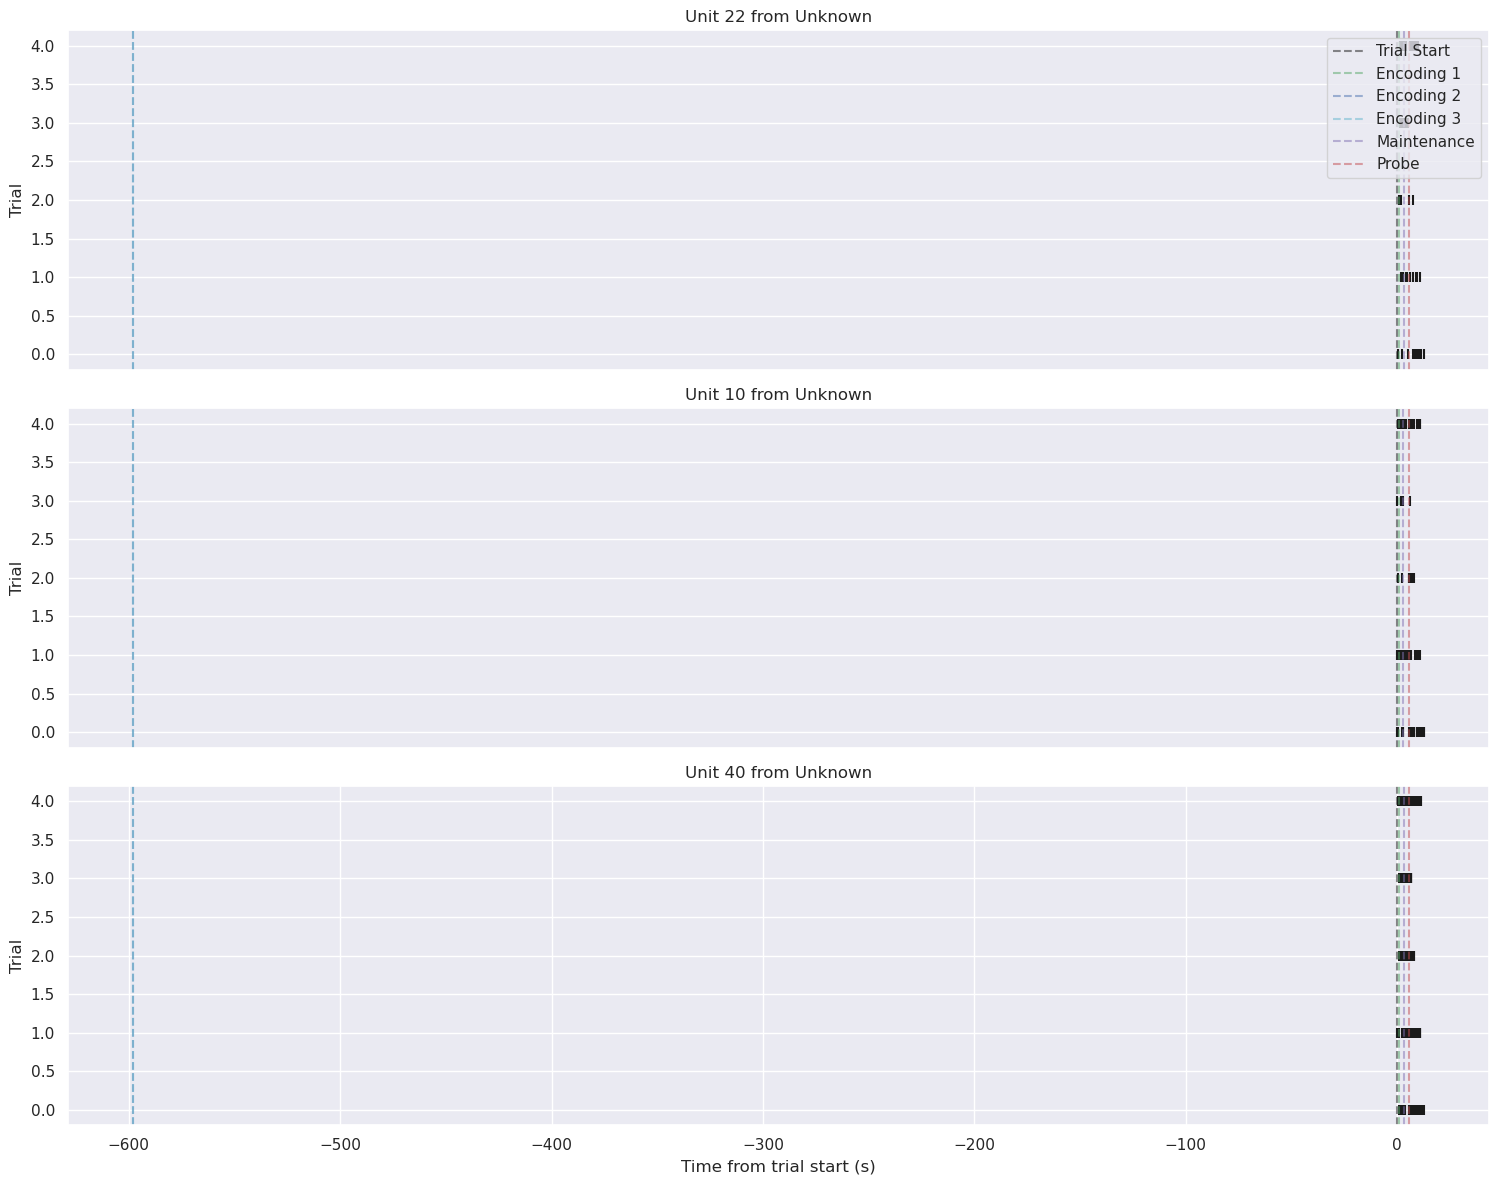

In [11]:
# Select a few units for analysis
sample_units = units_df.sample(min(3, len(units_df))).index.tolist()

# Select a few trials
sample_trials = np.random.choice(trials.index, size=5, replace=False)
sample_trials = sorted(sample_trials)

# Create raster plots
plt.figure(figsize=(15, 12))

for i, unit_id in enumerate(sample_units):
    unit = units_df.loc[unit_id]
    spike_times = unit['spike_times']
    location = unit['location']
    
    # Create subplot
    plt.subplot(len(sample_units), 1, i+1)
    
    # Plot spikes for each trial
    for j, trial_idx in enumerate(sample_trials):
        trial = trials.iloc[trial_idx]
        
        # Get trial start and end times
        trial_start = trial['start_time']
        trial_end = trial['stop_time']
        
        # Get key trial events
        encoding1_time = trial['timestamps_Encoding1']
        encoding2_time = trial['timestamps_Encoding2']
        encoding3_time = trial['timestamps_Encoding3']
        maintenance_time = trial['timestamps_Maintenance']
        probe_time = trial['timestamps_Probe']
        response_time = trial['timestamps_Response']
        
        # Get spikes during this trial
        trial_spikes = spike_times[(spike_times >= trial_start) & (spike_times <= trial_end)]
        
        # Normalize spike times relative to trial start
        normalized_spikes = trial_spikes - trial_start
        
        # Plot spikes
        plt.scatter(normalized_spikes, np.ones_like(normalized_spikes) * j, 
                   color='k', marker='|', s=50)
    
    # Get key trial events (use first trial for reference)
    ref_trial = trials.iloc[sample_trials[0]]
    encoding1_time = ref_trial['timestamps_Encoding1'] - ref_trial['start_time']
    encoding2_time = ref_trial['timestamps_Encoding2'] - ref_trial['start_time']
    encoding3_time = ref_trial['timestamps_Encoding3'] - ref_trial['start_time']
    maintenance_time = ref_trial['timestamps_Maintenance'] - ref_trial['start_time']
    probe_time = ref_trial['timestamps_Probe'] - ref_trial['start_time']
    
    # Add vertical lines for key events
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.5, label='Trial Start')
    plt.axvline(x=encoding1_time, color='g', linestyle='--', alpha=0.5, label='Encoding 1')
    plt.axvline(x=encoding2_time, color='b', linestyle='--', alpha=0.5, label='Encoding 2')
    plt.axvline(x=encoding3_time, color='c', linestyle='--', alpha=0.5, label='Encoding 3')
    plt.axvline(x=maintenance_time, color='m', linestyle='--', alpha=0.5, label='Maintenance')
    plt.axvline(x=probe_time, color='r', linestyle='--', alpha=0.5, label='Probe')
    
    plt.title(f'Unit {unit_id} from {location}')
    plt.ylabel('Trial')
    
    if i == 0:
        plt.legend(loc='upper right')
    
    if i == len(sample_units) - 1:
        plt.xlabel('Time from trial start (s)')
    else:
        plt.xticks([])

plt.tight_layout()

### Unit Firing Rates by Trial Phase

Let's analyze how firing rates change across different phases of the task:

Number of valid trials for phase analysis: 140


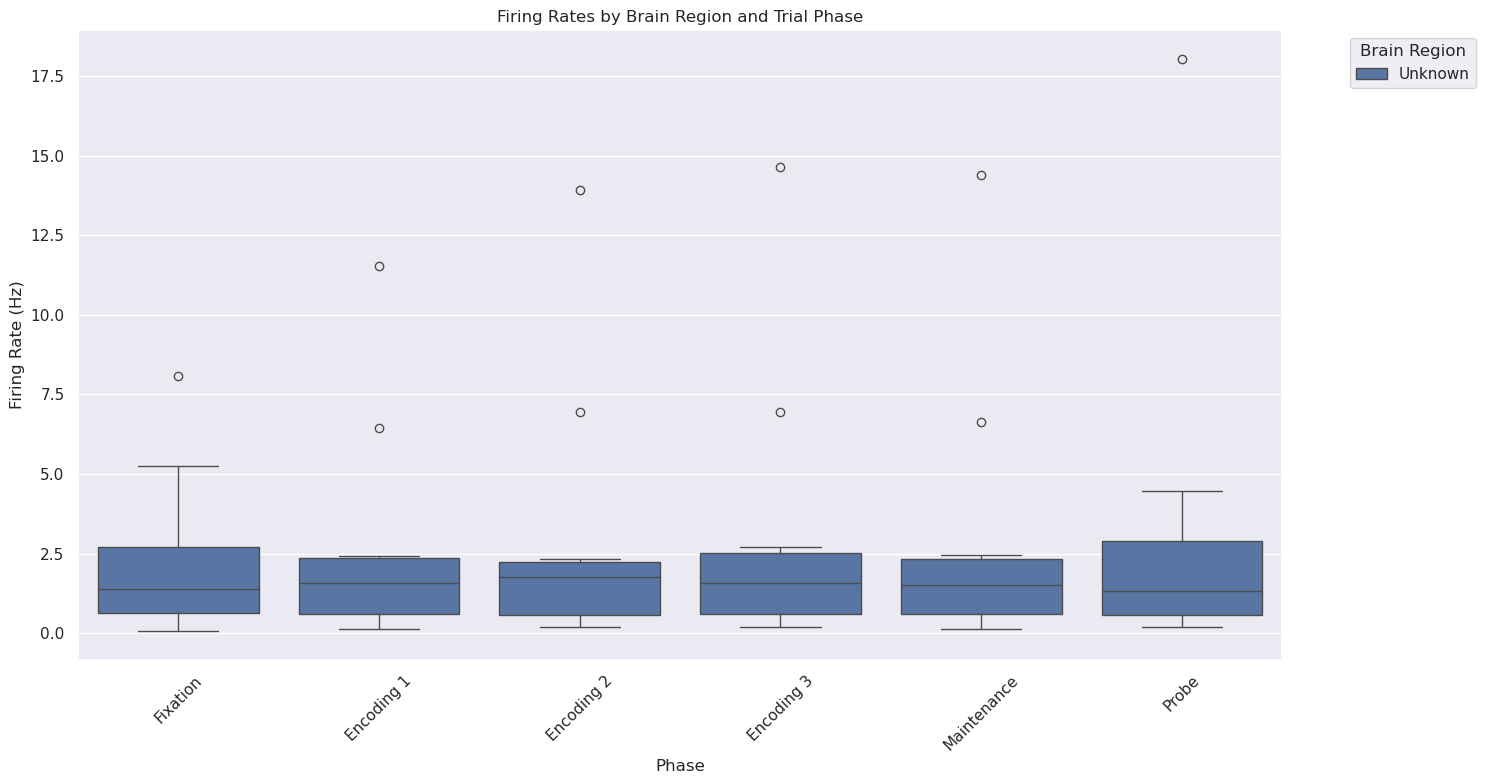

In [12]:
# Define phases
phases = [
    ('Fixation', 'timestamps_FixationCross', 'timestamps_Encoding1'),
    ('Encoding 1', 'timestamps_Encoding1', 'timestamps_Encoding1_end'),
    ('Encoding 2', 'timestamps_Encoding2', 'timestamps_Encoding2_end'),
    ('Encoding 3', 'timestamps_Encoding3', 'timestamps_Encoding3_end'),
    ('Maintenance', 'timestamps_Maintenance', 'timestamps_Probe'),
    ('Probe', 'timestamps_Probe', 'timestamps_Response')
]

# Filter out trials with any missing phase timestamps
valid_trials = trials.dropna(subset=[col for _, col, _ in phases] + [col for _, _, col in phases])
print(f"Number of valid trials for phase analysis: {len(valid_trials)}")

# Sample fewer units to make computation manageable
sample_units_for_rates = units_df.sample(min(10, len(units_df))).index.tolist()
all_firing_rates = []

# Calculate firing rates for each unit and phase
for unit_id in sample_units_for_rates:
    unit = units_df.loc[unit_id]
    spike_times = unit['spike_times']
    location = unit['location']
    
    unit_rates = {'unit_id': unit_id, 'location': location}
    
    # Calculate rate for each phase
    for phase_name, start_col, end_col in phases:
        spike_counts = []
        durations = []
        
        for _, trial in valid_trials.iterrows():
            phase_start = trial[start_col]
            phase_end = trial[end_col]
            duration = phase_end - phase_start
            
            # Count spikes in this phase
            n_spikes = np.sum((spike_times >= phase_start) & (spike_times <= phase_end))
            
            spike_counts.append(n_spikes)
            durations.append(duration)
        
        # Calculate mean rate
        if sum(durations) > 0:
            rate = sum(spike_counts) / sum(durations)
        else:
            rate = 0
            
        unit_rates[phase_name] = rate
    
    all_firing_rates.append(unit_rates)

# Convert to DataFrame
firing_rates_df = pd.DataFrame(all_firing_rates)

# Melt for easier plotting
melted_rates = pd.melt(
    firing_rates_df, 
    id_vars=['unit_id', 'location'], 
    value_vars=[p[0] for p in phases],
    var_name='Phase', 
    value_name='Firing Rate (Hz)'
)

# Plot firing rates
plt.figure(figsize=(15, 8))
sns.boxplot(x='Phase', y='Firing Rate (Hz)', hue='location', data=melted_rates)
plt.title('Firing Rates by Brain Region and Trial Phase')
plt.xticks(rotation=45)
plt.legend(title='Brain Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

## Stimulus Information

The experiment involved presenting visual stimuli to participants. Let's explore the stimulus images and presentation details:

Number of stimulus images: 281

Sample of images:
  image_101: shape (400, 300, 3)
  image_102: shape (400, 300, 3)
  image_103: shape (400, 300, 3)
  image_104: shape (400, 300, 3)
  image_105: shape (400, 300, 3)


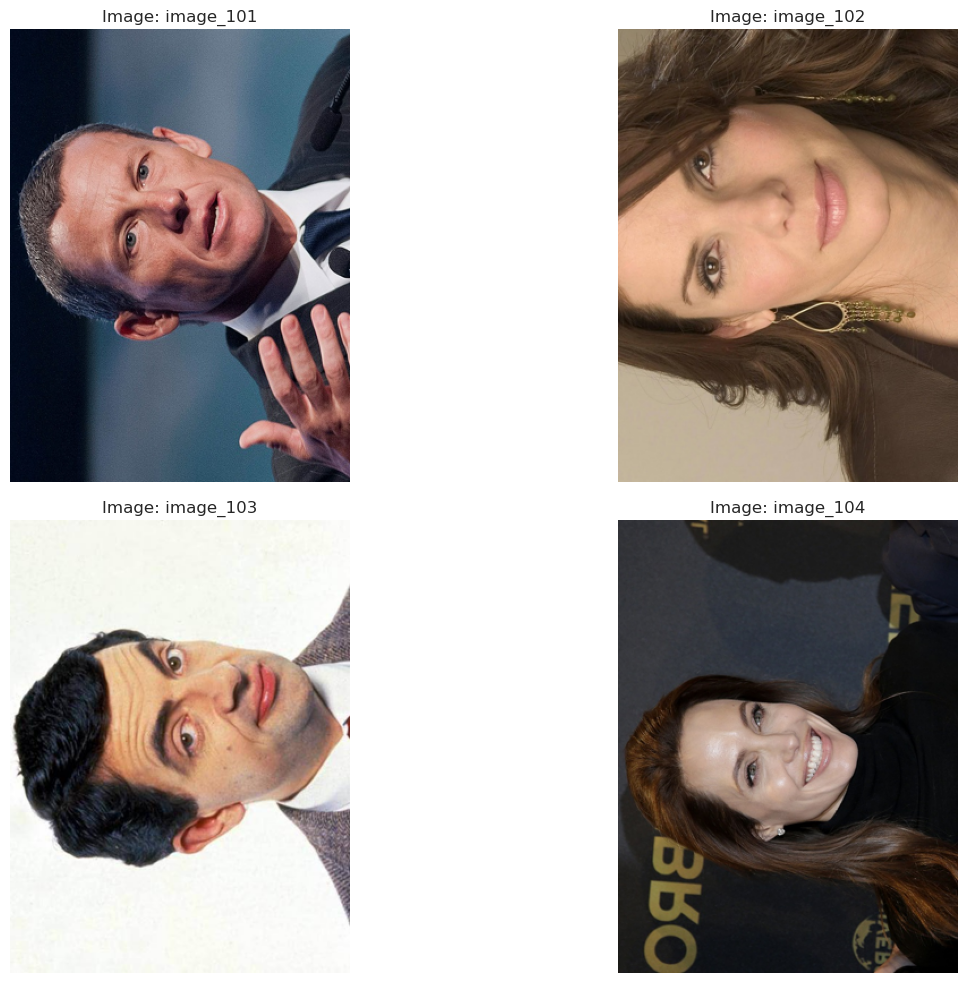

In [13]:
# Get stimulus information
stim_templates = nwb.stimulus_template['StimulusTemplates']
stim_presentation = nwb.stimulus['StimulusPresentation']

print(f"Number of stimulus images: {len(stim_templates.images)}")

# Print information about a few sample images
image_names = list(stim_templates.images.keys())[:5]  # Just get first 5 for demonstration
print("\nSample of images:")
for img_name in image_names:
    img = stim_templates.images[img_name]
    img_array = np.array(img.data)
    print(f"  {img_name}: shape {img_array.shape}")

# Display a few sample images
plt.figure(figsize=(15, 10))
for i, img_name in enumerate(image_names[:4]):  # Show first 4 sample images
    img = stim_templates.images[img_name]
    img_array = np.array(img.data)
    
    plt.subplot(2, 2, i+1)
    plt.imshow(img_array)
    plt.title(f'Image: {img_name}')
    plt.axis('off')

plt.tight_layout()

### Stimulus Presentation Sequence

Let's examine how stimuli were presented during the task:

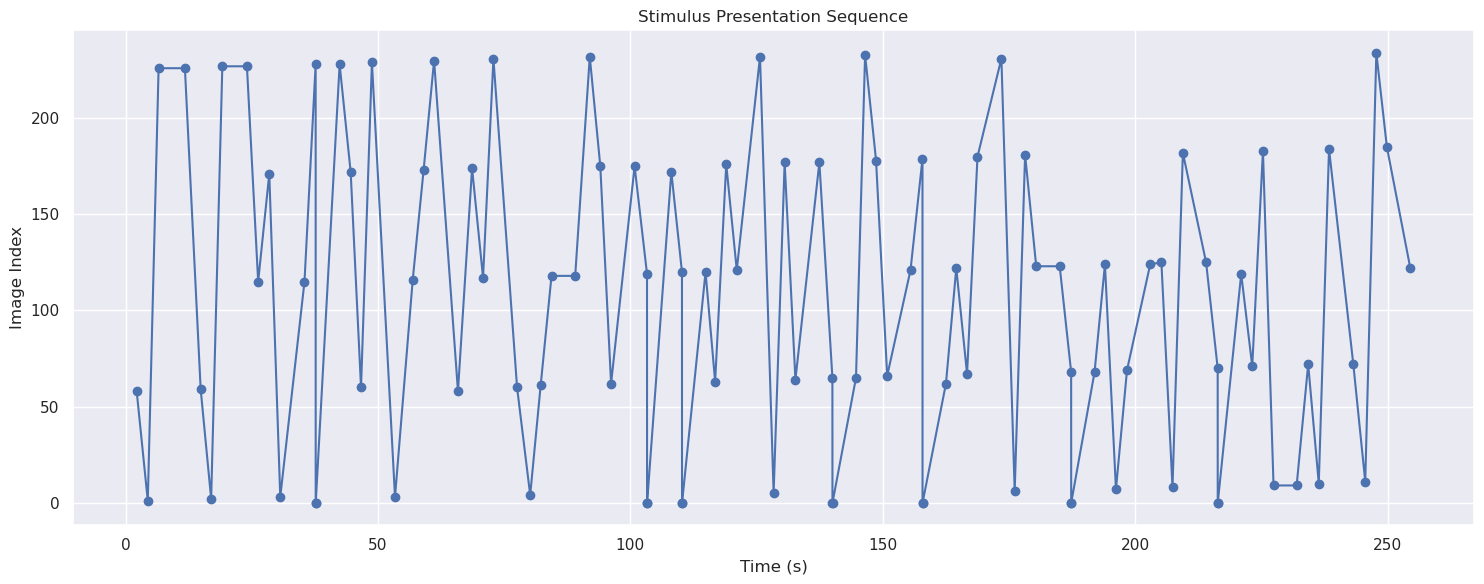

In [14]:
# Plot stimulus presentation sequence
plt.figure(figsize=(15, 6))
# Get a window of 100 stimulus presentations
window_size = 100
window_start = 0
window_end = min(window_start + window_size, len(stim_presentation.data))

# Convert data to numpy arrays for plotting
timestamps = np.array(stim_presentation.timestamps[window_start:window_end])
stim_indices = np.array(stim_presentation.data[window_start:window_end])

# Plot stimulus indices
plt.plot(timestamps, stim_indices, 'o-')
plt.xlabel('Time (s)')
plt.ylabel('Image Index')
plt.title('Stimulus Presentation Sequence')
plt.grid(True)
plt.tight_layout()

## Behavioral Performance

Let's analyze the subject's behavioral performance in the task:

Behavioral performance:
  Total trials: 140
  Trials with probe in encoding list: 70 (50.0%)
  Trials with probe not in encoding list: 70 (50.0%)
  Overall accuracy: 0.97
  Accuracy when probe in list: 0.94
  Accuracy when probe not in list: 1.00


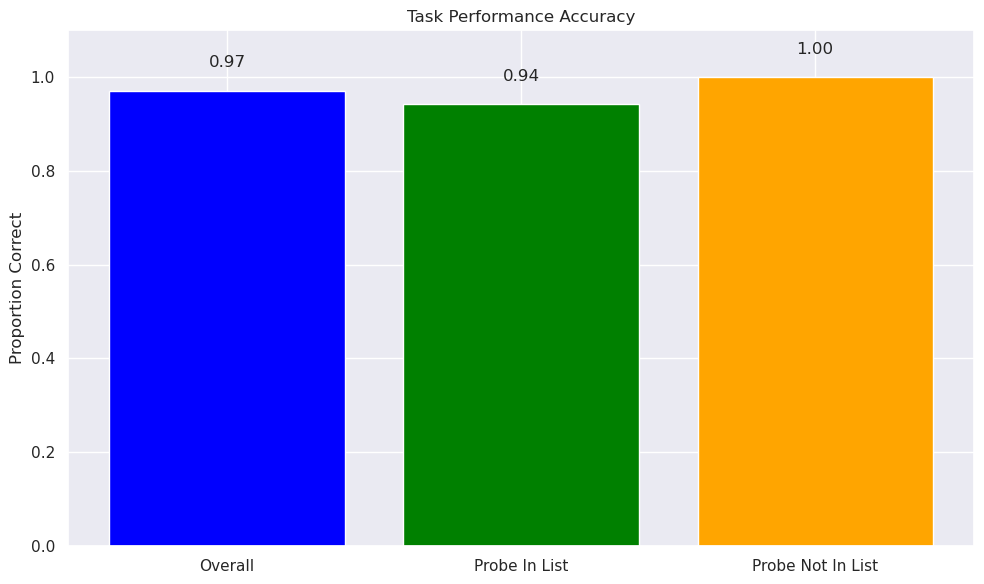

In [15]:
# Get trial statistics 
in_list_trials = trials[trials['probe_in_out'] == 1]
out_list_trials = trials[trials['probe_in_out'] == 0]

# Calculate accuracy
accuracy_in = in_list_trials['response_accuracy'].mean()
accuracy_out = out_list_trials['response_accuracy'].mean()
total_accuracy = trials['response_accuracy'].mean()

print("Behavioral performance:")
print(f"  Total trials: {len(trials)}")
print(f"  Trials with probe in encoding list: {len(in_list_trials)} ({len(in_list_trials)/len(trials)*100:.1f}%)")
print(f"  Trials with probe not in encoding list: {len(out_list_trials)} ({len(out_list_trials)/len(trials)*100:.1f}%)")
print(f"  Overall accuracy: {total_accuracy:.2f}")
print(f"  Accuracy when probe in list: {accuracy_in:.2f}")
print(f"  Accuracy when probe not in list: {accuracy_out:.2f}")

# Plot accuracy
plt.figure(figsize=(10, 6))
accuracies = [total_accuracy, accuracy_in, accuracy_out]
labels = ['Overall', 'Probe In List', 'Probe Not In List']
plt.bar(labels, accuracies, color=['blue', 'green', 'orange'])
plt.title('Task Performance Accuracy')
plt.ylabel('Proportion Correct')
plt.ylim(0, 1.1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.05, f'{acc:.2f}', ha='center')
plt.tight_layout()

## Summary and Future Directions

In this notebook, we've explored data from Dandiset 000673, which contains recordings from human medial temporal lobe and frontal cortex during a working memory task. We've examined:

1. Local Field Potential (LFP) data from different brain regions
2. Time-frequency decomposition of LFP signals
3. Single neuron activity during different phases of the task
4. Stimulus presentation and task structure
5. Behavioral performance on the working memory task

### Key Observations:

- The dataset contains recordings from multiple brain regions, including hippocampus, amygdala, and frontal cortical areas
- LFP signals show distinct patterns during different phases of the working memory task
- Single neurons exhibit phase-specific activity patterns, with some neurons responding more during specific task epochs
- The subject demonstrated high accuracy in the working memory task

### Future Directions:

Future analyses could explore:

1. Theta-gamma phase-amplitude coupling as mentioned in the dataset description
2. Correlations between neural activity and behavioral performance
3. Comparisons across multiple subjects in the dataset
4. Analysis of memory load effects (number of items to remember)
5. Neural representations of specific stimuli (visual category selectivity)

The code in this notebook provides a starting point for these more advanced analyses. Researchers can modify and extend it to investigate specific hypotheses relating to working memory and cognitive control.

### Reference:

For more information on this dataset, see:
- GitHub repository: https://github.com/rutishauserlab/SBCAT-release-NWB

## Close the File

In [16]:
# Close the NWB file
io.close()
remote_file.close()